# 金融数据爬虫可视化

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import time, re
%matplotlib inline

In [24]:
today = time.strftime('%Y-%m-%d')
data = pd.read_csv('../data/{}.csv'.format(today))
data = data[data['最新价'] != '-'] # 去掉未上市的股票
data.head()

,代码,名称,最新价,涨跌幅,涨跌额,成交量(手),成交额,振幅,最高,最低,今开,昨收,量比,换手率,市盈率(动态),市净率
0,300038,数知科技,4.00,20.12%,0.67,107.61万,3.95亿,23.42%,4.00,3.22,3.38,3.33,1.88,9.27%,209.83,0.43
1,300459,金科文化,3.42,20.00%,0.57,163.48万,5.40亿,10.53%,3.42,3.12,3.20,2.85,2.28,6.65%,14.52,2.76
2,300305,裕兴股份,9.67,19.98%,1.61,4.82万,4664.87万,0.00%,9.67,9.67,9.67,8.06,2.13,2.07%,23.66,1.75
3,300894,火星人,58.13,16.05%,8.04,16.56万,9.16亿,19.86%,59.95,50.00,50.00,50.09,0.90,43.55%,113.45,19.21
4,300321,同大股份,20.00,15.94%,2.75,2.64万,5010.06万,20.35%,20.65,17.14,17.50,17.25,2.95,3.22%,100.68,2.83


In [29]:
pattern = re.compile(r'(-*\d+\.\d+)%')
change = data['涨跌幅']
change = change.map(lambda x:re.findall(pattern, x)[0]).astype(float)
change

0       20.12
1       20.00
2       19.98
3       16.05
4       15.94
        ...  
4289   -11.01
4290   -12.07
4291   -12.13
4292   -13.60
4293   -13.83
Name: 涨跌幅, Length: 4129, dtype: float64

In [32]:
def count(change):
    from collections import defaultdict
    res = defaultdict(int)
    for num in change:
        if num < -7:
            res['<-7'] += 1
        elif -7 <= num < -5:
            res['-5~-7'] += 1
        elif -5 <= num < -3:
            res['-3~-5'] += 1
        elif -3 <= num < 0:
            res['-3~0'] += 1
        elif num == 0:
            res['0'] += 1
        elif 0 < num <= 3:
            res['0~3'] += 1
        elif 3 < num <= 5:
            res['3~5'] += 1
        elif 5 < num <= 7:
            res['5~7'] += 1
        elif num > 7:
            res['>7'] += 1
    return res

## 涨跌分布

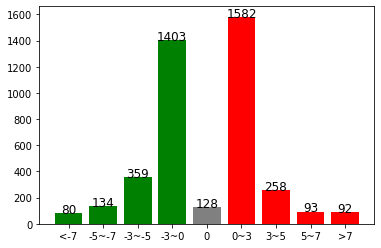

In [34]:
res = count(change)
res = list(res.items())
res.reverse()
x = [item[0] for item in res]
y = [item[1] for item in res]
plt.bar(x, y, color=['g']*4 + ['gray'] + ['r']*4)
for x, y in res:
    plt.text(x, y, '%d'%y, ha='center', size=12)
plt.show()